In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:

path = "D:\.vscode\kodingan\DataSource\credit_risk_1.csv"

loading_data_fromSC = pd.read_csv(path)

loading_data_fromSC.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
data = pd.DataFrame(loading_data_fromSC)
data

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


# Problem
## Busines Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman.

Pemberi pinjaman biasanya membuat dua jenis keputusan: pertama, apakah akan memberikan kredit kepada pemohon baru, dan kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka. Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya.

Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.



## Goal : 
1. prediksi potensi nasabah gagal bayar

### Problem : Klasifikasi
### Kemungkinan Algoritma :
        a. Desicion Tree
        b. Random Forest
        c. SVM
        d. XGBoost Tree Clasification



2. prediksi nilai kredit yang akan di berikan pada nasabah lama (Old Nasabah)
problem : Estimasi

## Data Description : 
age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)



In [4]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [5]:
data['ed'].value_counts()

ed
1    372
2    198
3     87
4     38
5      5
Name: count, dtype: int64

In [6]:
data['age'].value_counts()

age
29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: count, dtype: int64

<Axes: xlabel='variable', ylabel='value'>

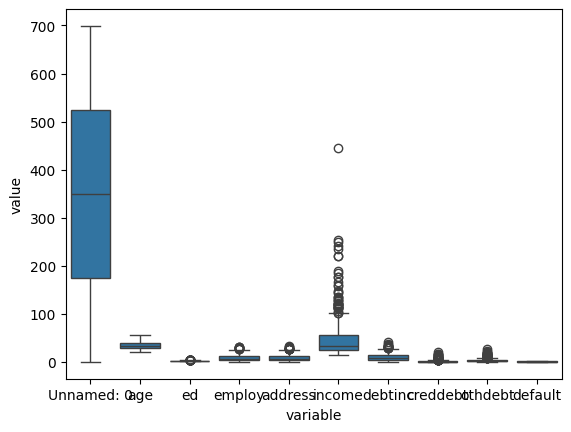

In [7]:
# melihat age dan ed dengan boxplot
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data))

# sns.boxplot(x = 'age', y = 'ed', data = data)

<Axes: xlabel='variable', ylabel='value'>

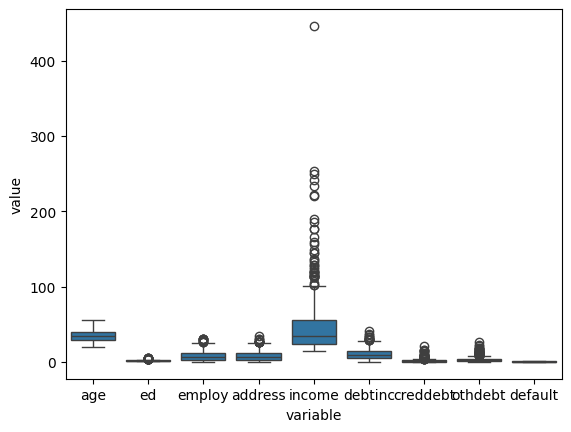

In [8]:
data_1 = data[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']]

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data_1))


<Axes: xlabel='variable', ylabel='value'>

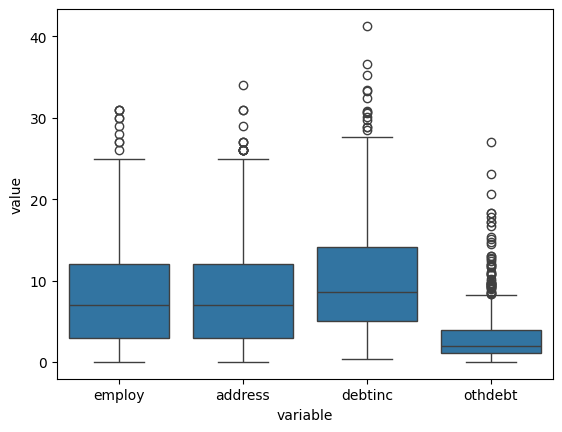

In [9]:
data_x = data[['employ', 'address', 'debtinc', 'othdebt']]
sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data_x))

<Axes: xlabel='variable', ylabel='value'>

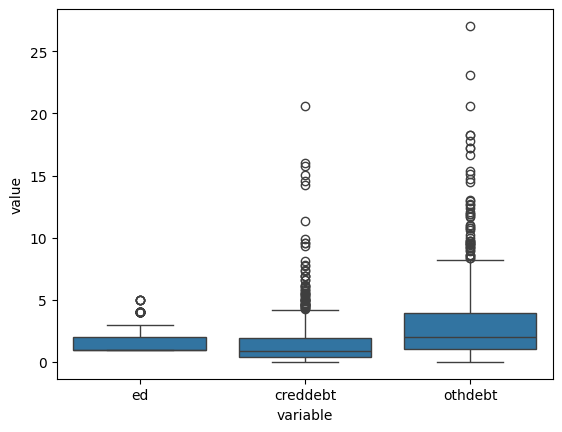

In [10]:
data_2 = data[[ 'ed', 'creddebt', 'othdebt']]

sns.boxplot(x = 'variable', y = 'value', data = pd.melt(data_2))



<Axes: xlabel='default', ylabel='count'>

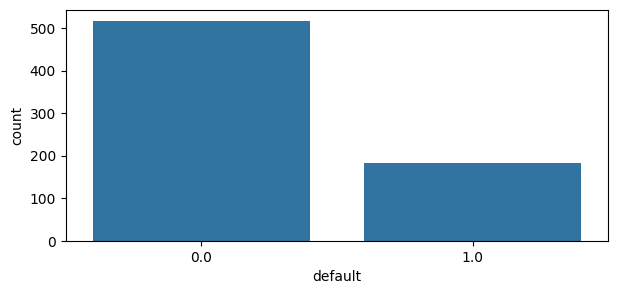

In [11]:
plt.figure(figsize = (7,3))
sns.countplot(x ='default', data=data )

<Axes: xlabel='default', ylabel='Count'>

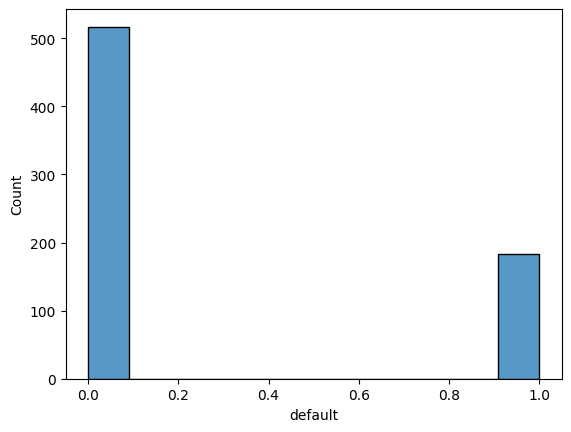

In [12]:
sns.histplot(x = 'default', data = data)

<Axes: xlabel='creddebt', ylabel='default'>

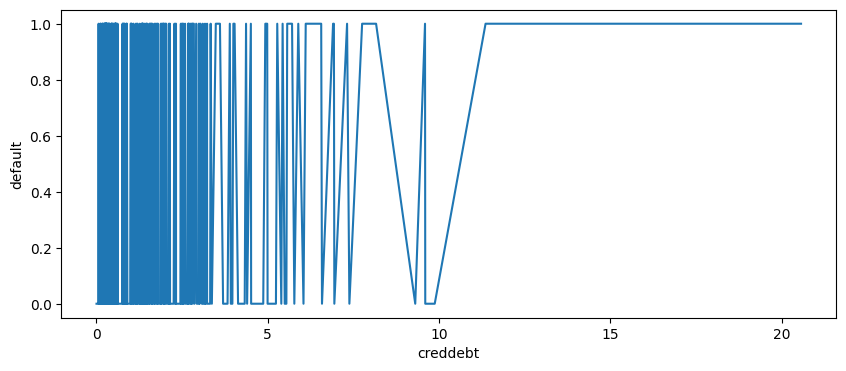

In [13]:
plt.figure(figsize=(10,4))
sns.lineplot(x ='creddebt',y = 'default', data=data )

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


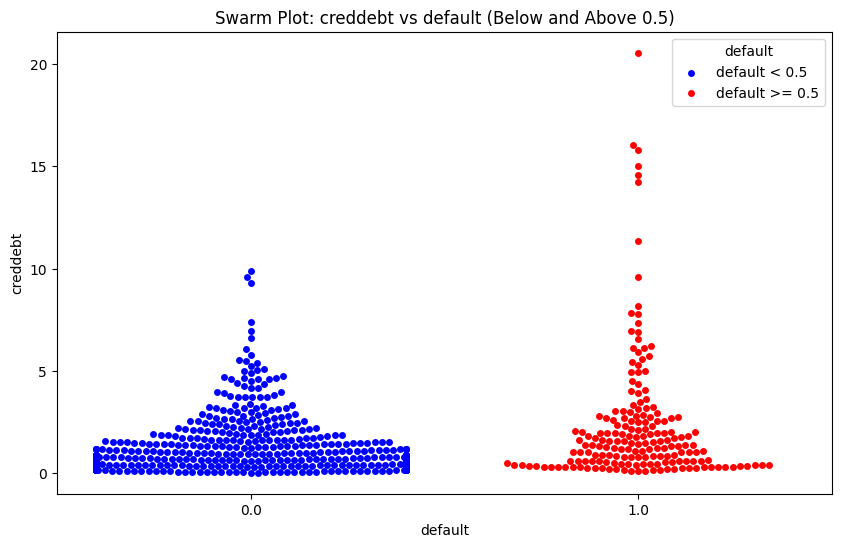

In [14]:
below_half = data[data["default"] < 0.5]
above_half = data[data["default"] >= 0.5]

# Create a swarm plot for "default" below 0.5
plt.figure(figsize=(10, 6))
sns.swarmplot(data=below_half, x="default", y="creddebt", color="blue", label="default < 0.5")

# Create a swarm plot for "default" above or equal to 0.5
sns.swarmplot(data=above_half, x="default", y="creddebt", color="red", label="default >= 0.5")

# Add labels and a legend
plt.title("Swarm Plot: creddebt vs default (Below and Above 0.5)")
plt.xlabel("default")
plt.ylabel("creddebt")
plt.legend(title="default")

# Show the plot
plt.show()

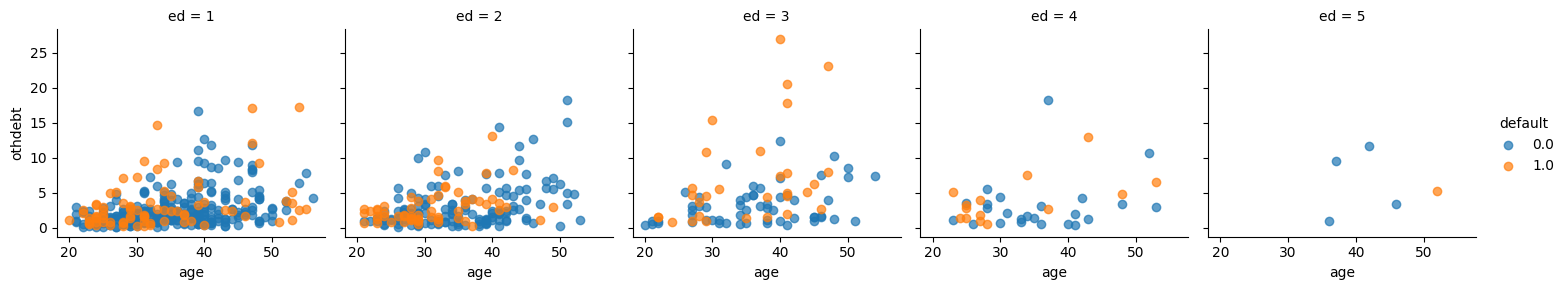

In [15]:
scatplot = sns.FacetGrid(data, col = 'ed', hue = 'default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha = .7)
scatplot.add_legend()

## Intepretasi

- Tinggkat pendidikan 1 (ed = 1)
    range usia 20-30 tingkat pendidikan 1, terjadi banyak gagal bayar.
- Tingkat pendidikan 2 (ed = 2)
    range usia 20-40 tingkat pendidikan 2, terjadi banyak gagal bayar.
- Tingkat pendidikan 3 (ed = 3)
    range usia 30-45 tingkat pendidikan 3, terjadi banyak gagal bayar.
- Tingkat pendidikan 4 (ed = 4)
    range usia 25-30 tingkat pendidikan 4 terjadi banyak gagal bayar.
- Tingkat pendidikan 5 (ed = 5)
    range usia diatas 50 tingkat pendidikan 5 tidak terjadi gagal bayar.




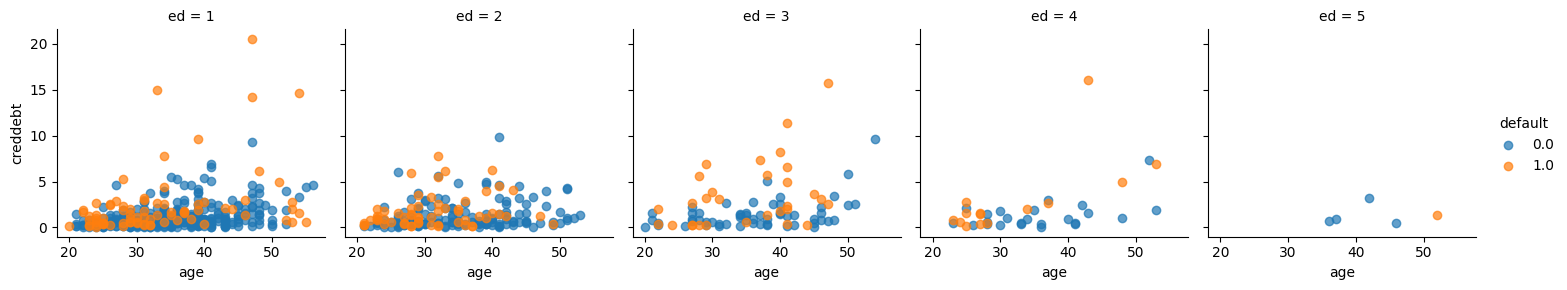

In [16]:
scatplot = sns.FacetGrid(data, col = 'ed', hue = 'default')
scatplot.map(plt.scatter, 'age', 'creddebt', alpha = .7)
scatplot.add_legend()

In [17]:
fig = px.scatter(data, x = "creddebt", y = "othdebt", color = "default", 
                 size = "income",)

fig.show()

# Machine Learning


## Data Prep (goal 1)

1. Tidak ada temuan missing value
2. hanya di gunakan 1 table

## Data Modelling 

In [18]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
# input Variable
x = data[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]

# Target Variable 
y = data['default'].astype('category')

In [20]:

# untuk pemodelan, maka kita harus membagi data menjadi data training dan testing
# tujuannyaa adalah agar kita bisa mengukur akurasi/error predict
# karena ini termasuk supervised learning maka harus ada pembagian training dan testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
# Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Create an instance of MLPRegressor with desired hyperparameters
clf = DecisionTreeClassifier()

# Train the model on the training data
model_clf = clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_clf = model_clf.predict(x_test)

In [24]:
# Evaluasi Klasifikasi
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.79       101
         1.0       0.48      0.62      0.54        39

    accuracy                           0.71       140
   macro avg       0.66      0.68      0.66       140
weighted avg       0.73      0.71      0.72       140



## Evaluasi 

1. Model dalam mempredik orang yang **TIDAK GAGAL BAYAR** akurasi sebesar 84%, sedangkan overall accuracy 69%.
jadi bisa di simmpulkan bahwa model UNDERFIT dalam mempredik TIDAK GAGAL BAYAR

2. Model OVERFIT dalam memprediksi orang yang **GAGAL BAYAR**. hal ini di tunjukan dengan nilai precision sebesesar 45% dan nilai accuracy overall 69% artinya precisi lebih rendah dari pada accuraci (high accuracy dan low precisi)

3. Berdasarkan confusion matrix, maka model pintar dalam mempredict orang yang tidak gagal bayar

4. model menggunakan decision tree tidak bisa di implementasikan pada case ini

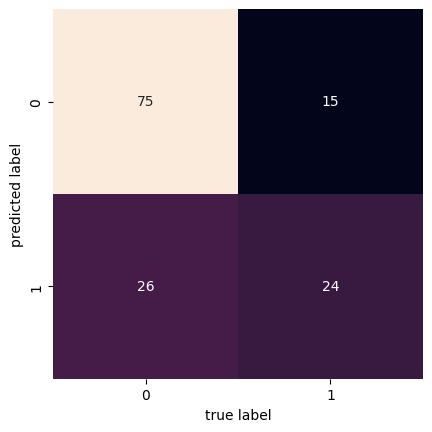

In [25]:
# Create the confusion matrix
mat = confusion_matrix(y_test, y_pred_clf)

# Visualize the confusion matrix using a heatmap
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Show the plot
plt.show()

<Axes: >

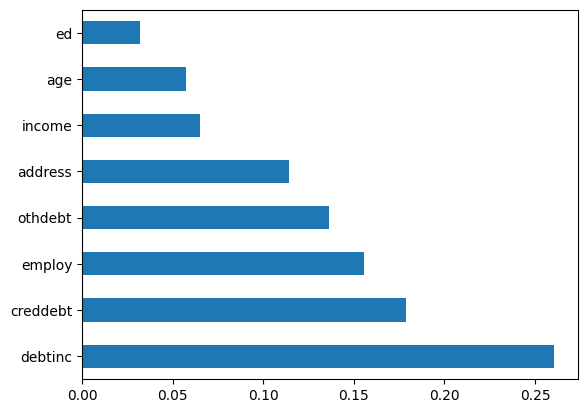

In [26]:
# Signifikan faktor dari model

feat_importances = pd.Series(model_clf.feature_importances_, index = x.columns)

feat_importances.nlargest(10).plot(kind = 'barh')

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [28]:
# Create an instance of MLPRegressor with desired hyperparameters
rf = RandomForestClassifier(n_estimators = 1000, max_depth=6, random_state = 0)

# Train the model on the training data
model_rf = rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = model_rf.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85       101
         1.0       0.65      0.28      0.39        39

    accuracy                           0.76       140
   macro avg       0.71      0.61      0.62       140
weighted avg       0.74      0.76      0.72       140



## Evaluasi Random Forest

1. model dalam mempredik orang yang **TIDAK GAGAL BAYAR** memiliki overall akurasi 76% dan presisi 77%. high presicion low accuracy jadi **UNDERFIT**. model baik dalam memprediksi orang yang **TIDAK GAGAL BAYAR**


2. model dalam mempredik orang yang **GAGAL BAYAR** memiliki overall akurasi 76% dan presisi 65%. high accuracy low presicion **OVERFIT**


### hasil evaluasi setelah tuning model dengan menambahkan hype params
1. model di nilai tepat dalam mempredik nilai 0 atau orang yang tidak gagal bayar.
2. model masih overfit dalam mempredik orang yang gagal bayar atau nilai 1


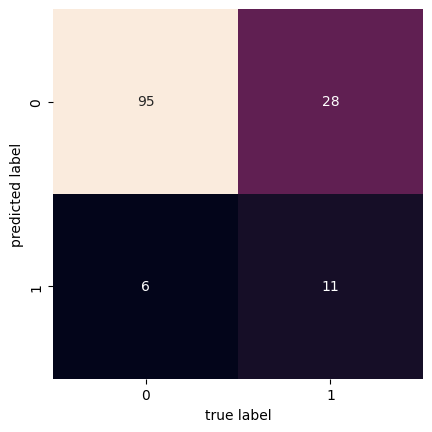

In [30]:
mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)

plt.xlabel('true label')
plt.ylabel('predicted label')

plt.show()

<Axes: >

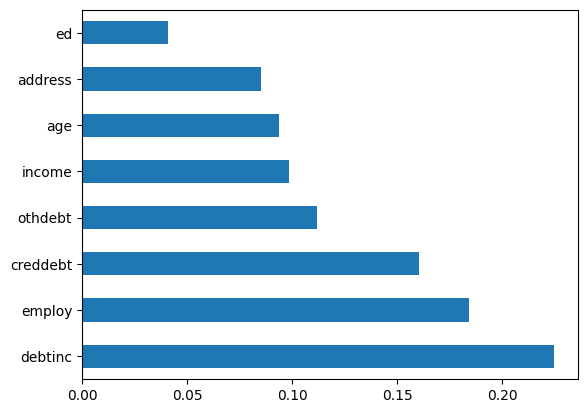

In [31]:
# Signifikan faktor dari model

feat_importances = pd.Series(model_rf.feature_importances_, index = x.columns)

feat_importances.nlargest(10).plot(kind = 'barh')

In [32]:
from sklearn.svm import SVC

In [33]:
# Create an instance of MLPRegressor with desired hyperparameters
svm = SVC(kernel = 'linear', random_state=0)

# Train the model on the training data
model_svm = svm.fit(x_train, y_train)

# Make predictions on the test data
y_pred_svm= model_svm.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86       101
         1.0       0.67      0.41      0.51        39

    accuracy                           0.78       140
   macro avg       0.73      0.67      0.68       140
weighted avg       0.76      0.78      0.76       140



Text(113.9222222222222, 0.5, 'predicted label')

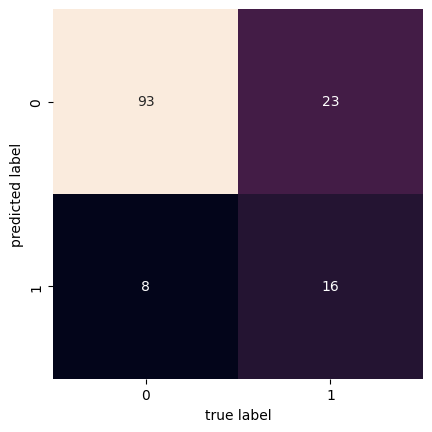

In [35]:
mat = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')



## Evaluasi SVM

1. model dalam mempredik orang yang **TIDAK GAGAL BAYAR** memiliki overall akurasi 78% dan presisi 80%. high presicion low accuracy jadi **UNDERFIT**. model baik dalam memprediksi orang yang **TIDAK GAGAL BAYAR**


2. model dalam mempredik orang yang **GAGAL BAYAR** memiliki overall akurasi 78% dan presisi 67%. high accuracy low presicion **OVERFIT**

model masih overfit.

3. berdasarkan confusion matrix

## Pemodelan menggunakan XG boost 


In [36]:
from xgboost import XGBRFClassifier

In [37]:
# Create an instance of MLPRegressor with desired hyperparameters
xgb = XGBRFClassifier(n_estimators = 1000, max_depth=6, random_state = 0)

# Train the model on the training data
model_xgb = xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xgb = model_xgb.predict(x_test)

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:335: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:338: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:384: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:359: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\ANGELO\AppData\Local\Programs\Python\Python39\lib\site-pack

In [38]:
# evaluasi 
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83       101
         1.0       0.55      0.46      0.50        39

    accuracy                           0.74       140
   macro avg       0.67      0.66      0.66       140
weighted avg       0.73      0.74      0.74       140



Text(113.9222222222222, 0.5, 'predicted label')

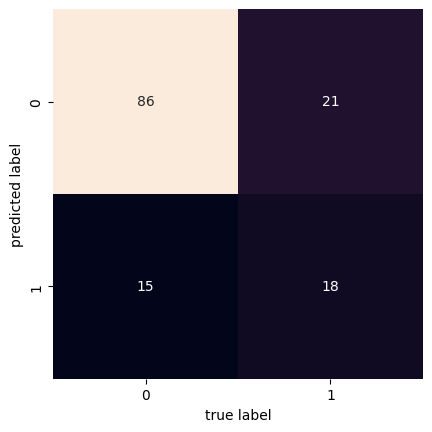

In [39]:
mat = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')


## Evaluasi XG boost


1. model dalam mempredik orang yang **TIDAK GAGAL BAYAR** memiliki overall akurasi 74% dan presisi 80%. high presicion low accuracy jadi **UNDERFIT**. model baik dalam memprediksi orang yang **TIDAK GAGAL BAYAR**


2. model dalam mempredik orang yang **GAGAL BAYAR** memiliki overall akurasi 74% dan presisi 55%. high accuracy low presicion **OVERFIT**

model masih overfit.

3. berdasarkan confusion matrix

<Axes: >

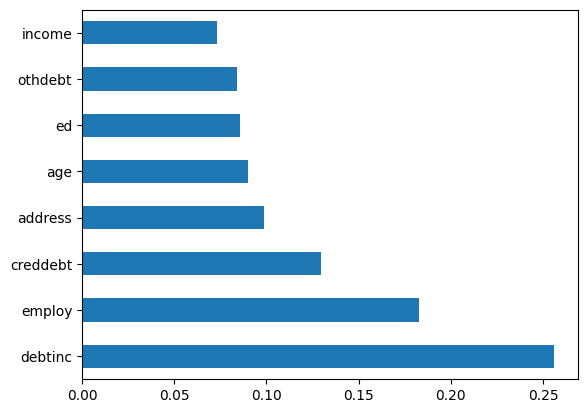

In [40]:
# Signifikan faktor dari model

feat_importances = pd.Series(model_xgb.feature_importances_, index = x.columns)

feat_importances.nlargest(10).plot(kind = 'barh')

# Conclusion/Kesimpulan

1. kita akan menggunakan model **SVM** untuk implementasi Machine Learning dalam memutuskan mana nasabah yang akan di terima permohonan kredit

# Implementasi Machine Learning Model SVM


In [41]:

data2 = pd.read_csv("D:\.vscode\kodingan\DataSource\credit_risk_newCust.csv", delimiter= "," )

data2

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...,...
145,845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
146,846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
147,847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
148,848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [42]:
# input variable 
x1 = data2[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]


In [43]:
y_predict_data2 = model_svm.predict(x1)

y_predict_data2

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
df_predict_data2 = pd.DataFrame({"Predict_gagalBayar" :y_predict_data2}).round(2)

In [45]:
df_predict_data2

,Predict_gagalBayar
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [46]:
df_hasil_predict_svm = pd.concat([data2, df_predict_data2], axis=1, sort = False)
df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Predict_gagalBayar
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [47]:
df_hasil_predict_svm['Predict_gagalBayar'].value_counts()

Predict_gagalBayar
0.0    127
1.0     23
Name: count, dtype: int64

### GOAL 2
2. prediksi nilai kredit yang akan di berikan pada nasabah lama (Old Nasabah)
problem : Estimasi

algortima : linear regression, MLP.

## nyoba

In [48]:
# Goal 2 nyoba nyoba

# Calculate the creddebt berdasasr kan ed
def mark_creddebt(creddebt):
    return 1 if creddebt > 0.3 else 2

data['creddebt_marked'] = data['creddebt'].apply(mark_creddebt)




In [49]:
# Features
x = data[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'default', 'othdebt', 'creddebt']]



# Target variable
y = data['creddebt_marked']


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

nyoba_goal2 = RandomForestRegressor(n_estimators = 1000, max_depth=6, random_state = 0)

# Train the model on the training data
model_nyoba_goal2 = nyoba_goal2.fit(x_train, y_train)

# Make predictions on the test data
y_pred_nyoba_goal2 = model_nyoba_goal2.predict(x_test)





In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_nyoba_goal2)
mse = mean_squared_error(y_test, y_pred_nyoba_goal2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_nyoba_goal2)

mape = np.mean(np.abs((y_test - y_pred_nyoba_goal2) / y_test)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 0.002464285714285714
Mean Squared Error (MSE): 0.0007430928571428574
Root Mean Squared Error (RMSE): 0.027259729586752275
R-squared (R2): 0.9953556696428572
Mean Absolute Percentage Error (MAPE): 0.12964285714285714


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


a = LinearRegression()

# Train the model on the training data
model_a = a.fit(x_train, y_train)

# Make predictions on the test data
y_pred_a= model_a.predict(x_test)


In [54]:
# Evaluasi Model
print("r2_score: ", metrics.r2_score(y_test, y_pred_a))

mape = np.mean(np.abs((y_test - y_pred_a) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)



r2_score:  0.21524979538750855
Mean Absolute Percentage Error (MAPE): 21.12752753088057


## MLP


In [55]:
from sklearn.neural_network import MLPRegressor

# Create an instance of the MLPRegressor 
b = MLPRegressor(max_iter = 1000)

# Train the model on the training data
model_b = b.fit(x_train, y_train)

# Make predictions on the test data
y_pred_b = model_b.predict(x_test)

In [56]:
# Evaluasi Model
print("r2_score: ", metrics.r2_score(y_test, y_pred_b))

mape = np.mean(np.abs((y_test - y_pred_b) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


r2_score:  0.5229187904219849
Mean Absolute Percentage Error (MAPE): 15.359978832017305


## Desicion Tree

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of DecisionTreeRegressor
a1 = DecisionTreeRegressor()

# Train the model on the training data
model_a1 = a1.fit(x_train, y_train)

# Make predictions on the test data
y_pred_a1 = model_a1.predict(x_test)


In [58]:
# Evaluasi Model
print("r2_score: ", metrics.r2_score(y_test, y_pred_a1))

mape = np.mean(np.abs((y_test - y_pred_a1) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


r2_score:  1.0
Mean Absolute Percentage Error (MAPE): 0.0


## Ini yang bener?

In [59]:
# create object 

data_oldnasabah = data
data_oldnasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,creddebt_marked
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,1
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,1
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,1
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,1
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,1


In [60]:
data_oldnasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       700 non-null    int64  
 1   age              700 non-null    int64  
 2   ed               700 non-null    int64  
 3   employ           700 non-null    int64  
 4   address          700 non-null    int64  
 5   income           700 non-null    int64  
 6   debtinc          700 non-null    float64
 7   creddebt         700 non-null    float64
 8   othdebt          700 non-null    float64
 9   default          700 non-null    float64
 10  creddebt_marked  700 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 60.3 KB


In [67]:
# kenaikan nilai kredit di berikan kepada nasabah lama yang tidak pernah gagal bayar dan creddebt di bawah 30%


data_oldnasabah1 = data_oldnasabah[(data_oldnasabah['default'] == 0)&(data_oldnasabah['creddebt'] < 0.3)]

data_oldnasabah1
data_oldnasabah1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 7 to 693
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       115 non-null    int64  
 1   age              115 non-null    int64  
 2   ed               115 non-null    int64  
 3   employ           115 non-null    int64  
 4   address          115 non-null    int64  
 5   income           115 non-null    int64  
 6   debtinc          115 non-null    float64
 7   creddebt         115 non-null    float64
 8   othdebt          115 non-null    float64
 9   default          115 non-null    float64
 10  creddebt_marked  115 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 10.8 KB


In [69]:
data_oldnasabah1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,creddebt_marked
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0,2
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0,2
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0,2
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0,2
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0,2
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0,2
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0,2
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0,2


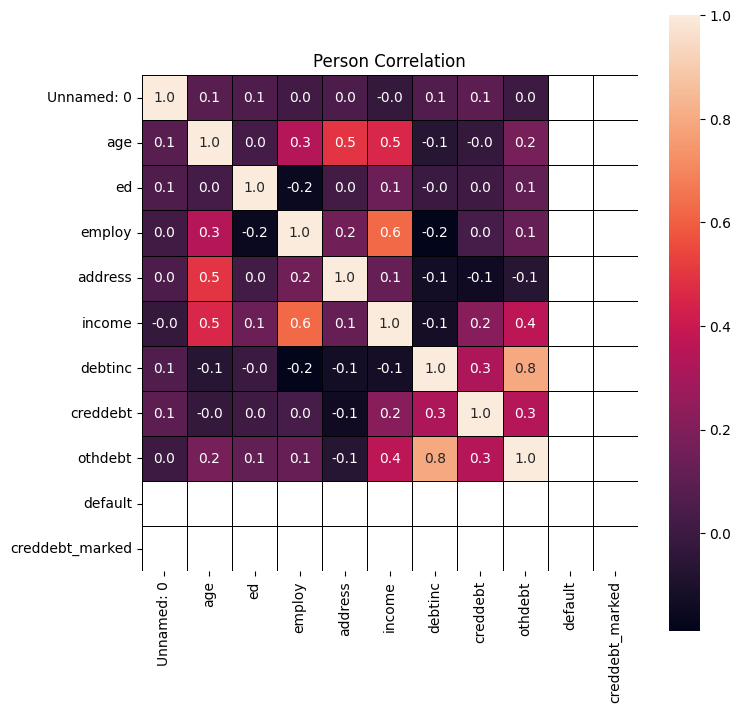

In [79]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Person Correlation')
sns.heatmap(data_oldnasabah1.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, square=True, linecolor='black')
plt.show()

In [100]:
# Input Variable 
input_var = data_oldnasabah1[['age', 'ed', 'employ', 'address', 'income', 'debtinc','othdebt','creddebt', 'default']]

# Target Variable
output_var = data_oldnasabah1['']


In [96]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size = 0.2, random_state = 0)



In [98]:
# Train the model on the training data with linear regression
line = LinearRegression()
line.fit(x_train, y_train)
y_pred_line = line.predict(x_test)


In [99]:
# Evaluasi Model
print("r2_score: ", metrics.r2_score(y_test, y_pred_line))

mape = np.mean(np.abs((y_test - y_pred_line) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

r2_score:  0.039281975219663035
Mean Absolute Percentage Error (MAPE): 88.10719158611889
